# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [179]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
#hide
df_all = read_api()
df_all.index.name = 'date'
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
#df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [181]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [182]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin hitting $200K by December 2021 is now ‘conservative’ — Willy Woo.  BTC/USD is more likely to reach $300,000 in a year's time, the popular analyst says, thanks to an "amplified bullish feedback loop." ... [| Skaityti daugiau](https://cointelegraph.com/news/bitcoin-hitting-200k-by-december-2021-is-now-conservative-willy-woo) 

In [183]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- COVID-19 economic distortions mean Chrystia Freeland faces dangers ahead | CBC News.  As the finance minister in a minority government that will one day soon have to face the electorate, Chrystia Freeland must do her best to satisfy a majority and plan for a future with many uncertainties. ... [| Skaityti daugiau](http://www.cbc.ca/news/business/plenty-of-booby-traps-on-a-path-to-economic-recovery-littered-with-unknowns-1.5824058) 

### Kainų kaita pandemijos metu

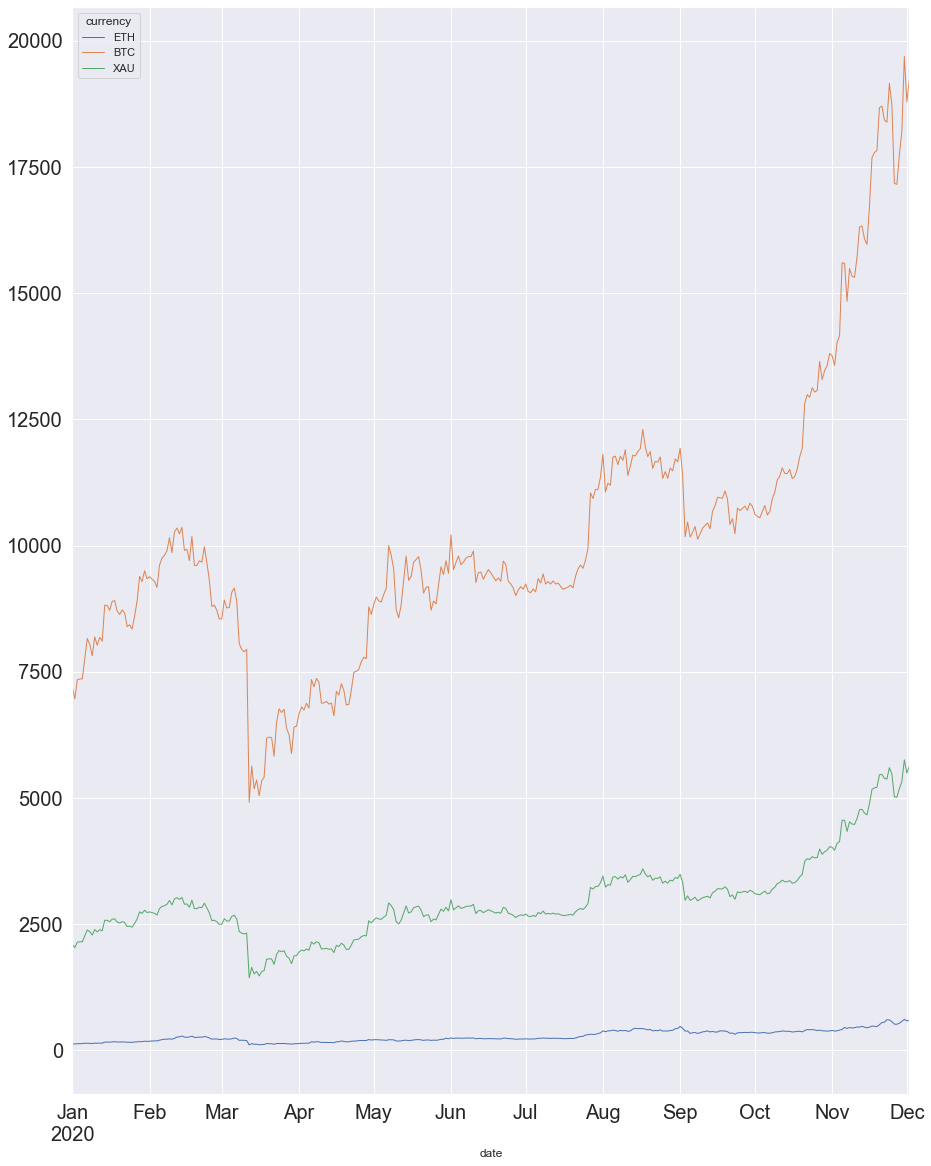

In [184]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [185]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU
currency,,,
ETH,1.000000,0.925605,0.925604
BTC,0.925605,1.000000,1.000000
XAU,0.925604,1.000000,1.000000


### Koreliacijos matrica.

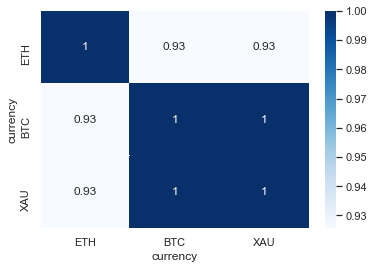

In [186]:
#hide_input
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')